In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from src.LoadDogs2 import create_training_data
import matplotlib.pyplot as plt
import numpy as np

2022-09-02 13:00:27.785194: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nags205/root/build/lib
2022-09-02 13:00:27.785291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Fit by some models, input data = 56*56

In [2]:
(train_images, train_labels), (test_images, test_labels) = create_training_data(IMG_SIZE = 56)

Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


## model1

In [3]:
model1 = models.Sequential()

model1.add(layers.ZeroPadding2D(padding=(1, 1), input_shape=(56, 56, 3)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.Dropout(0.1))
model1.add(layers.ZeroPadding2D(padding=(2, 2)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.1))
model1.add(layers.ZeroPadding2D(padding=(2, 2)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.Dropout(0.1))
model1.add(layers.ZeroPadding2D(padding=(2, 2)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))


model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4,activation='softmax'))

model1.summary()

2022-09-02 13:06:02.227585: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nags205/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/nags205/root/build/lib
2022-09-02 13:06:02.228265: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-02 13:06:02.228355: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (NagS205): /proc/driver/nvidia/version does not exist
2022-09-02 13:06:02.242244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 58, 58, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 32)        896       
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 60, 60, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0

In [4]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2022-09-02 13:06:18.135936: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1610988288 exceeds 10% of free system memory.
2022-09-02 13:06:25.859339: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30105600 exceeds 10% of free system memory.
2022-09-02 13:06:25.941393: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30105600 exceeds 10% of free system memory.
2022-09-02 13:06:26.058272: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30105600 exceeds 10% of free system memory.


   1/1338 [..............................] - ETA: 58:54 - loss: 42.2744 - accuracy: 0.2500

2022-09-02 13:06:26.383992: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30105600 exceeds 10% of free system memory.


1338/1338 [==============================] - 585s 435ms/step - loss: 1.5968 - accuracy: 0.3710
Epoch 2/5
1338/1338 [==============================] - 566s 423ms/step - loss: 0.7544 - accuracy: 0.6216
Epoch 3/5
1338/1338 [==============================] - 570s 426ms/step - loss: 0.6008 - accuracy: 0.7274
Epoch 4/5
1338/1338 [==============================] - 567s 424ms/step - loss: 0.4951 - accuracy: 0.7800
Epoch 5/5
1338/1338 [==============================] - 561s 419ms/step - loss: 0.4273 - accuracy: 0.8175


In [5]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

133/133 [==============================] - 11s 84ms/step - loss: 1.1368 - accuracy: 0.6696


# evaluation of models

In [6]:
class_names = ['dog', 'cat', 'rhinoceros', 'stag']

In [7]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('uint8'), cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## model 1

In [8]:
probability_model1 = tf.keras.Sequential([model1,
                                         tf.keras.layers.Softmax()])
predictions1 = probability_model1.predict(test_images)

133/133 [==============================] - 8s 60ms/step


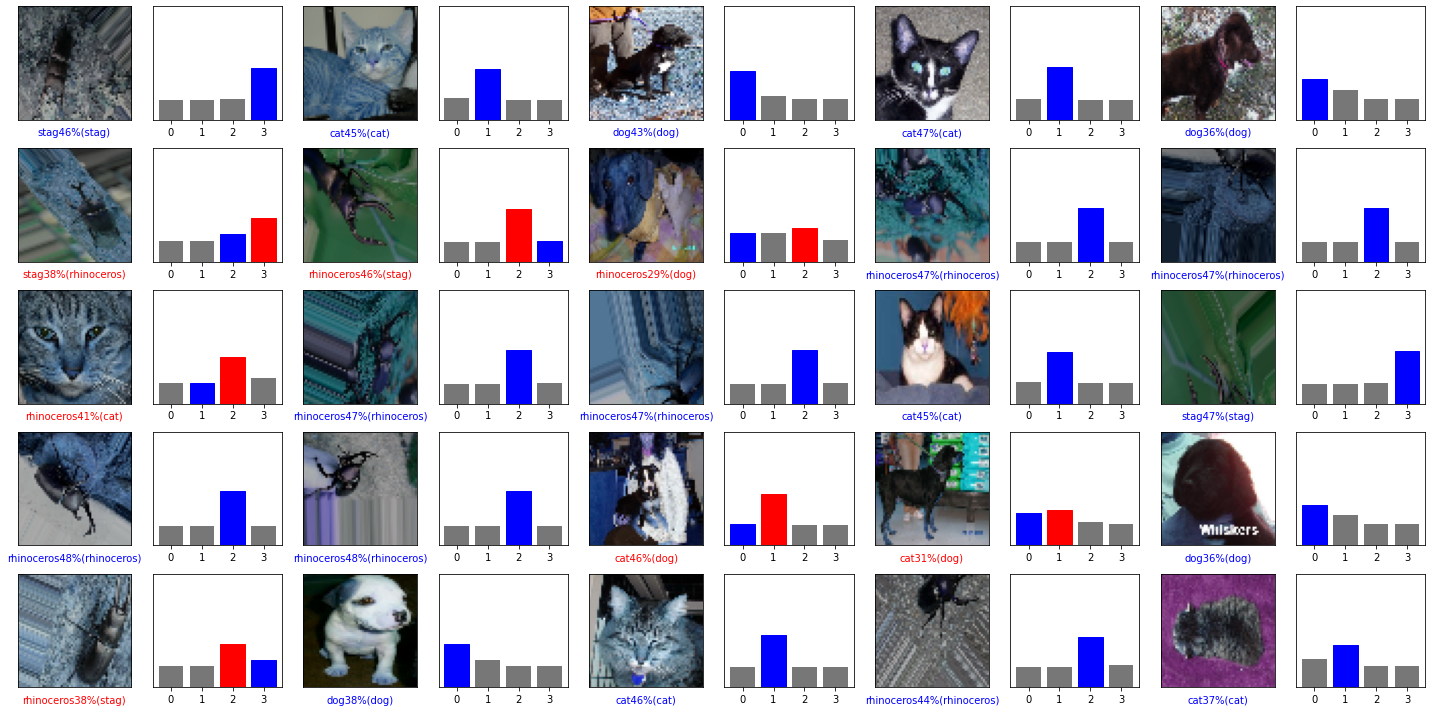

In [9]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

batch_mask = np.random.choice(len(test_images), num_images)
img_batch = test_images[batch_mask]
label_batch = test_labels[batch_mask]
predictions_batch = predictions1[batch_mask]

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_batch[i], label_batch, img_batch)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_batch[i], label_batch)
plt.tight_layout()
plt.show()